In [39]:
# Best Practice: Combine Both
# You often use ColumnTransformer inside a Pipeline!

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Define transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['age']),
    ('cat', OneHotEncoder(), ['city'])
])

# Combine preprocessing and model into a pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression())
])


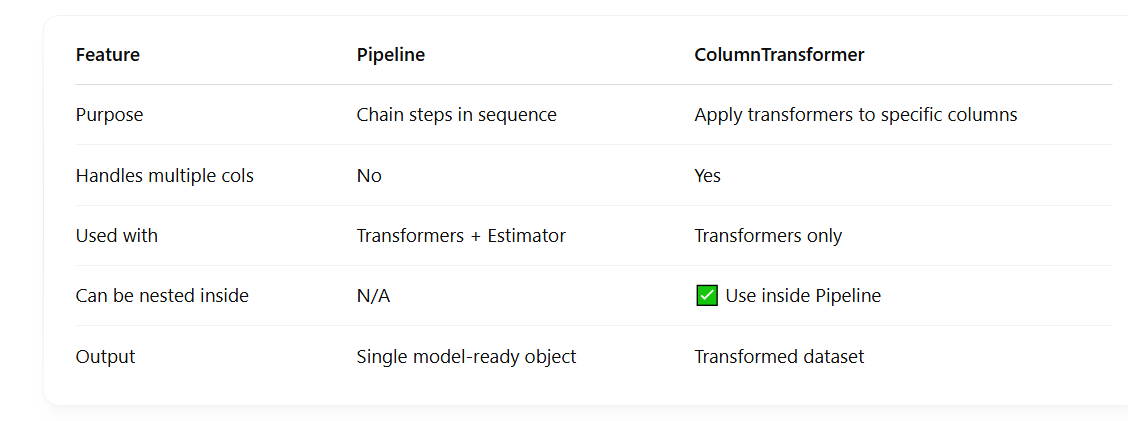

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


In [21]:
df=pd.read_csv('Day028_Sample_data_covid_toy.csv')

In [22]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [23]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['has_covid']),df['has_covid'],test_size=0.2)


Manually Type output

In [25]:
# adding simpe imputer to fever column

si=SimpleImputer()
x_train_fever=si.fit_transform(x_train[['fever']])


x_test_fever=si.fit_transform(x_test[['fever']])

x_train_fever.shape

(80, 1)

In [26]:
# Ordinal Encoding 
oe=OrdinalEncoder(categories=[['Mild','Strong']])
x_train_cough=oe.fit_transform(x_train[['cough']])

x_test_cough=oe.fit_transform(x_test[['cough']])

x_train_cough.shape

(80, 1)

In [27]:
x_train.head(5)

,age,gender,fever,cough,city
40,49,Female,102.0,Mild,Delhi
80,14,Female,99.0,Mild,Mumbai
93,27,Male,100.0,Mild,Kolkata
67,65,Male,99.0,Mild,Bangalore
31,83,Male,103.0,Mild,Kolkata


In [28]:
# OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse_output=False)
x_train_gender_city=ohe.fit_transform(x_train[['gender','city']])

x_test_gender_city=ohe.fit_transform(x_test[['gender','city']])


print(x_test_gender_city.shape)
print(x_train_gender_city.shape)

(20, 4)
(80, 4)


In [29]:
# Extractig Age
x_train_age=x_train.drop(columns=['gender','fever','cough','city']).values

# For test data
x_test_age=x_test.drop(columns=['gender','fever','cough','city']).values

In [30]:
x_train_age.shape

(80, 1)

In [31]:
x_train_transformed=np.concatenate((x_train_age,x_train_fever
                                    ,x_train_gender_city,x_train_cough),
                                    axis=1)


In [32]:
x_train_transformed

array([[ 49.        , 102.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ],
       [ 14.        ,  99.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ],
       [ 27.        , 100.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ],
       [ 65.        ,  99.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 83.        , 103.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ],
       [ 82.        , 102.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 60.        , 103.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ],
       [ 12.        ,  98.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   1.        ],
       [ 72.        ,  99.        ,   1.        ,   0.        ,
          0.    

In [33]:
x_train_transformed.shape

(80, 7)

By help of Column transformer

In [34]:
from sklearn.compose import ColumnTransformer #This is how to import columntransformer

transformer=ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']), # in a fever column by the help of Si we fill missing values by mean , meadian, mode
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['Cough']),

    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),
     ['gender','city'])
],remainder='passthrough')
# remainder  => passthrough => it mean rest all the columns remains same

In [35]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', SimpleImputer(), ['fever']),
                                ('tnf2',
                                 OrdinalEncoder(categories=[['Mild',
                                                             'Strong']]),
                                 ['Cough']),
                                ('tnf3',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'city'])])

In [36]:
from sklearn.compose import ColumnTransformer

# Creating the ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        # Fill missing values in the 'fever' column using SimpleImputer (mean by default)
        ('tnf1', SimpleImputer(), ['fever']),
        
        # Encode the 'Cough' column with OrdinalEncoder, using the specified categories
        ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
        
        # Apply OneHotEncoding to 'gender' and 'city' columns, drop first category to avoid dummy variable trap
        ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender', 'city'])
    ],
    remainder='passthrough'  # Leave other columns unchanged
)


# transformed_data = transformer.fit_transform(df)


In [37]:
# Apply the transformation after dropping the 'age' column
transformed_data = transformer.fit_transform(x_train)

# Get the shape of the transformed data
print(transformed_data.shape)


(80, 7)


In [38]:
transformed_data

array([[102.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  49.        ],
       [ 99.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  14.        ],
       [100.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  27.        ],
       [ 99.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  65.        ],
       [103.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  83.        ],
       [102.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  82.        ],
       [103.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  60.        ],
       [ 98.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  12.        ],
       [ 99.        ,   0.        ,   1.        ,   0.        ,
          0.    